In [1]:
#! -*- coding: UTF8 -*-
import os
os.chdir(os.getcwd())

## Import Module

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
import matplotlib as mpl
%matplotlib inline
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')

## Import Data

In [4]:
df = pd.read_excel('process_data/GPP_6210501001_real.xlsx',sheet_name="LopBuri",index_col="Year") #ตัวอย่าง
df.head()

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี),รายจ่ายของประชากรในจังหวัดลพบุรี (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),เนื้อที่สำหรับปลูกพืชไร่ (ไร่),เนื้อที่สำหรับปลูกนาข้าว (ไร่),จำนวนโรงงานอุตสาหกรรม (โรงงาน),GPP Per capita (Baht)
Year,,,,,,,,,,,,,,,,,,,,,
1995,5391.575854,19.009823,7176.043232,590.238706,142.277622,3391.005101,3484.507633,1016.736730,176.898917,195.790885,...,48.223830,37.278020,59467272,0.11918,14642.057073,2.918084e+06,1.193555e+06,813441.826432,17,143862.554
1996,6206.682558,37.744703,6810.317457,677.218307,137.423999,7728.645631,3737.141208,1113.256820,153.858116,224.369211,...,45.255728,37.081286,60130190,0.11918,14781.331342,2.855555e+06,1.188872e+06,813529.791485,18,171503.917
1997,6014.415215,36.238535,6988.106194,817.941119,149.159330,5647.894247,4542.778789,1172.783861,140.141879,234.727143,...,46.814732,36.564600,60846588,0.10214,14820.227125,2.838092e+06,1.187564e+06,813554.357901,19,179223.451
1998,6270.177149,28.193053,5739.574622,1090.869869,130.489143,3182.288913,4987.801949,1245.856126,474.662929,229.726314,...,42.303171,36.111727,61585103,0.17525,14827.222516,2.834951e+06,1.187329e+06,813558.776161,19,180611.806
1999,5684.674097,42.046276,4594.756351,958.722269,143.734495,2304.876078,4652.336854,1226.177795,564.896952,241.436570,...,44.267746,36.378900,62298569,0.24836,14873.804036,2.814037e+06,1.185763e+06,813588.196856,20,189856.706


## Principal Component Analysis : Scikit-Learn

In [5]:
X = df.drop('GPP Per capita (Baht)',1)
y = df['GPP Per capita (Baht)']

/var/folders/37/ffyx67ps24v157rdzs_y3pkc0000gn/T/ipykernel_5611/3021477077.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('GPP Per capita (Baht)',1)


In [6]:
# Split data into training and test sets using ratio = 70:30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

In [7]:
# First, compute mean and SD 
mean_X_train = X_train.mean()
std_X_train = X_train.std()

In [8]:
# Normalize the input matrix for training data
scaled_X_train = (X_train-mean_X_train)/std_X_train
scaled_X_train

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี),การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี),รายจ่ายของประชากรในจังหวัดลพบุรี (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),เนื้อที่สำหรับปลูกพืชไร่ (ไร่),เนื้อที่สำหรับปลูกนาข้าว (ไร่),จำนวนโรงงานอุตสาหกรรม (โรงงาน)
Year,,,,,,,,,,,,,,,,,,,,,
1999,-1.104362,-0.651607,-1.389047,-1.097043,-1.082380,0.316388,-0.969120,-0.986492,1.696478,-1.811601,...,-0.565718,-1.994533,-0.725911,-1.323263,-0.487482,-0.660194,1.249376,1.244038,0.250163,-0.816457
2017,1.512656,2.638212,1.779250,1.531701,1.986360,-0.438012,2.282505,2.038846,1.189663,1.618091,...,-1.085901,-0.663574,-1.737192,1.240212,2.613591,0.716087,-1.192618,-1.493314,-0.475764,-0.916177
1995,-1.166092,-0.712142,-1.149787,-1.732569,-1.099866,3.107990,-1.550310,-1.464429,-1.120701,-2.238646,...,-0.364491,-1.465393,-0.057403,-2.373429,-1.019179,-0.940380,1.657391,1.651584,-0.002104,-1.115617
2015,0.981605,0.828661,1.288585,1.254123,1.365056,-0.056081,1.127017,1.104427,0.647210,0.372410,...,-0.587390,-0.264403,-0.874407,1.056499,1.026073,3.081834,-1.190018,-1.465644,-0.591238,3.072620
2016,1.060135,2.063359,1.384864,1.309671,1.092965,-0.086684,1.624742,1.358939,0.856398,0.474188,...,-1.009288,-0.759107,-1.314873,1.151748,1.693185,0.550875,-1.192057,-1.463970,-1.651182,0.280462
2004,-0.757063,-0.537334,-0.460810,-0.301311,-0.221536,-0.701403,-0.498057,-0.977588,-0.983514,0.393095,...,-0.140113,0.302315,0.406758,-0.323008,-0.528970,-0.161226,0.522763,0.518261,0.699412,-0.317857
2013,1.324676,-0.150685,0.895025,1.036114,0.940178,0.510869,0.434545,0.576332,0.333911,1.099425,...,2.031246,0.817415,-0.339516,0.845079,0.308047,0.634660,-1.199861,-0.435051,-1.247886,0.380182
2008,0.412717,-0.206629,-0.396032,-0.363827,-0.516968,-1.477573,-0.463071,0.433533,-0.745502,-0.348848,...,0.695164,1.316243,1.579509,0.246595,-0.672905,-0.040939,-0.956840,-0.959639,1.614220,0.779062
2003,-0.824253,-0.617037,-0.475580,-0.610916,-0.687440,-0.463488,-0.595104,-0.760223,-0.622555,0.249873,...,0.020507,-0.536284,0.418560,-0.488226,-0.499912,-0.252736,0.656024,0.651369,0.617020,-0.417577


In [9]:
# Compute covariance matrix of normalized input
cov_scaled_X_train = np.cov(scaled_X_train.T)
cov_scaled_X_train.shape

# Notice that original dimension of variables = p = 4
# Hence, covariance matrix has size = pxp = 4x4

(30, 30)

In [10]:
# Compute eigenvalues and eigenvectors of covariance matrix
from numpy.linalg import eig

eig_values, eig_vectors = eig(cov_scaled_X_train)
eig_values.shape

# Results have 4 eigenvalues

(30,)

In [11]:
# Results have 4 correponding eigenvectors

eig_vectors.shape

(30, 30)

In [12]:
# Matching each pair of eigenvalue and eigenvector and store them in eig_pairs
# Sort eig_pairs using eigenvalues from max to min

eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
eig_pairs

[(19.275289548789683,
  array([-0.21616257+0.j, -0.1882396 +0.j, -0.22182865+0.j, -0.22519421+0.j,
         -0.21250103+0.j,  0.07821089+0.j, -0.21815192+0.j, -0.21742604+0.j,
         -0.08355284+0.j, -0.18014043+0.j, -0.21813139+0.j, -0.1790844 +0.j,
         -0.21302719+0.j, -0.15122696+0.j, -0.21229169+0.j, -0.21492296+0.j,
         -0.22445136+0.j, -0.19737733+0.j, -0.21765254+0.j, -0.07904261+0.j,
         -0.02975196+0.j, -0.05984659+0.j,  0.09606499+0.j, -0.21750142+0.j,
         -0.20063196+0.j, -0.14256345+0.j,  0.21451243+0.j,  0.21402331+0.j,
          0.14365654+0.j, -0.12724873+0.j])),
 (4.519296018798742,
  array([ 1.58942773e-02+0.j, -1.69081636e-01+0.j, -3.90782407e-02+0.j,
          1.33112516e-04+0.j, -1.04041952e-01+0.j, -2.43806376e-01+0.j,
         -8.80321097e-02+0.j,  3.36281964e-03+0.j, -2.81948642e-01+0.j,
          1.39286794e-01+0.j, -6.65636917e-02+0.j,  1.91696501e-01+0.j,
         -8.81261923e-02+0.j, -1.09153534e-01+0.j,  2.17094853e-02+0.j,
          1.

In [13]:
# First, obtain mean and variance of input matrix of traning data
# (Later on, mean and SD will be used to normalize input matrix.)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

In [14]:
# Show mean of input matrix of training data, computed by Scikit-Learn

scaler.mean_

array([1.09282355e+04, 2.90012860e+02, 1.95806361e+04, 1.59479761e+03,
       2.33913852e+02, 2.18177910e+03, 6.59966307e+03, 1.65847764e+03,
       3.31248325e+02, 4.35074055e+02, 2.55711479e+03, 2.66950413e+03,
       3.41091294e+01, 2.38272585e+02, 1.12698683e+04, 3.55057317e+03,
       1.40377777e+03, 1.18719828e+02, 3.95032590e+02, 1.06305638e+02,
       9.42217249e+00, 5.91797705e+01, 3.73552258e+01, 6.58661476e+07,
       3.66797500e-01, 1.54198617e+04, 2.49543745e+06, 1.16197935e+06,
       8.13443047e+05, 2.81875000e+01])

In [15]:
# Show mean of input matrix of training data, computed manually earlier

mean_X_train

Agriculture, forestry and fishing                                      1.092824e+04
Mining and quarrying                                                   2.900129e+02
Manufacturing                                                          1.958064e+04
Electricity, gas, steam and air conditioning supply                    1.594798e+03
Water supply; sewerage, waste management and remediation activities    2.339139e+02
Construction                                                           2.181779e+03
Wholesale and retail trade and repair of motor vehicles                6.599663e+03
Transportation and storage                                             1.658478e+03
Accommodation and food service activities                              3.312483e+02
Information and communication                                          4.350741e+02
Financial and insurance activities                                     2.557115e+03
Real estate activities                                                 2.669

In [16]:
# Show SD of input matrix of training data, computed by Scikit-Learn 

np.sqrt(scaler.var_)

array([4.59727700e+03, 3.68462212e+02, 1.04460221e+04, 5.61397405e+02,
       8.06701610e+01, 3.76715573e+02, 1.94556927e+03, 4.24303908e+02,
       1.33352375e+02, 1.03493343e+02, 1.28148070e+03, 4.80730384e+02,
       2.13077095e+01, 6.47086367e+01, 3.84311543e+03, 1.11703938e+03,
       5.18055598e+02, 5.68495854e+01, 1.51977471e+02, 1.25125684e+01,
       9.05704351e-01, 7.23904230e+00, 1.30225866e+00, 2.61043560e+06,
       2.35242937e-01, 8.00852907e+02, 2.46909831e+05, 1.85110375e+04,
       5.61794644e+02, 9.70965209e+00])

In [17]:
# Show SD of input matrix of training data, computed manually earlier

std_X_train

# SD's computed by Scikit-Learn and by manually have little difference
# This will contribute to the difference in eigenvalues later

Agriculture, forestry and fishing                                      4.748047e+03
Mining and quarrying                                                   3.805461e+02
Manufacturing                                                          1.078861e+04
Electricity, gas, steam and air conditioning supply                    5.798087e+02
Water supply; sewerage, waste management and remediation activities    8.331578e+01
Construction                                                           3.890702e+02
Wholesale and retail trade and repair of motor vehicles                2.009375e+03
Transportation and storage                                             4.382192e+02
Accommodation and food service activities                              1.377257e+02
Information and communication                                          1.068875e+02
Financial and insurance activities                                     1.323508e+03
Real estate activities                                                 4.964

In [18]:
# Normalize input matrix for training data set using mean and SD (by using function transform)
# Then, use the same mean and SD from train to normalize input matrix for test data set

sk_scaled_X_train = scaler.transform(X_train)
sk_scaled_X_test = scaler.transform(X_test)

# Note that: 
# scaler = StandardScaler().fit(X_train)
# sk_scaled_X_train = scaler.transform(X_train)
# are equivalent to:
# scaler = StandardScaler()
# sk_scaled_X_train = scaler.fit_transform(X_train)

#### components = 2

In [19]:
# Select number of principal components and perform PCA
# From manual steps, we know that number of selected principal components should be 2.
# On the other hand, you can perform PCA multiple times with different numbers of principal components
# and check explained_variance_ratio_ afterward to find appropriate number of selected principal components

from sklearn.decomposition import PCA

num_components=2
pca2 = PCA(n_components=num_components)
pca2.fit(sk_scaled_X_train)

PCA(n_components=2)

In [20]:
# Show variances (or eigenvalues) of selected components

pca2.explained_variance_

array([20.56030885,  4.82058242])

In [21]:
# Show principal components (or eigenvectors) of selected components

pca2.components_

array([[-2.16162572e-01, -1.88239599e-01, -2.21828653e-01,
        -2.25194205e-01, -2.12501028e-01,  7.82108889e-02,
        -2.18151924e-01, -2.17426037e-01, -8.35528427e-02,
        -1.80140432e-01, -2.18131387e-01, -1.79084397e-01,
        -2.13027186e-01, -1.51226956e-01, -2.12291686e-01,
        -2.14922959e-01, -2.24451361e-01, -1.97377328e-01,
        -2.17652539e-01, -7.90426104e-02, -2.97519627e-02,
        -5.98465887e-02,  9.60649858e-02, -2.17501415e-01,
        -2.00631963e-01, -1.42563450e-01,  2.14512434e-01,
         2.14023315e-01,  1.43656538e-01, -1.27248735e-01],
       [ 1.58942773e-02, -1.69081636e-01, -3.90782407e-02,
         1.33112516e-04, -1.04041952e-01, -2.43806376e-01,
        -8.80321097e-02,  3.36281964e-03, -2.81948642e-01,
         1.39286794e-01, -6.65636917e-02,  1.91696501e-01,
        -8.81261923e-02, -1.09153534e-01,  2.17094853e-02,
         1.23475640e-01, -5.67956972e-02,  3.99863798e-02,
         9.03297461e-02,  4.14084202e-01,  2.85555931e-

In [22]:
# Compare results from explained_variance_ and components_ from Scikit-learn
# to eig_paris from manual steps

eig_pairs

[(19.275289548789683,
  array([-0.21616257+0.j, -0.1882396 +0.j, -0.22182865+0.j, -0.22519421+0.j,
         -0.21250103+0.j,  0.07821089+0.j, -0.21815192+0.j, -0.21742604+0.j,
         -0.08355284+0.j, -0.18014043+0.j, -0.21813139+0.j, -0.1790844 +0.j,
         -0.21302719+0.j, -0.15122696+0.j, -0.21229169+0.j, -0.21492296+0.j,
         -0.22445136+0.j, -0.19737733+0.j, -0.21765254+0.j, -0.07904261+0.j,
         -0.02975196+0.j, -0.05984659+0.j,  0.09606499+0.j, -0.21750142+0.j,
         -0.20063196+0.j, -0.14256345+0.j,  0.21451243+0.j,  0.21402331+0.j,
          0.14365654+0.j, -0.12724873+0.j])),
 (4.519296018798742,
  array([ 1.58942773e-02+0.j, -1.69081636e-01+0.j, -3.90782407e-02+0.j,
          1.33112516e-04+0.j, -1.04041952e-01+0.j, -2.43806376e-01+0.j,
         -8.80321097e-02+0.j,  3.36281964e-03+0.j, -2.81948642e-01+0.j,
          1.39286794e-01+0.j, -6.65636917e-02+0.j,  1.91696501e-01+0.j,
         -8.81261923e-02+0.j, -1.09153534e-01+0.j,  2.17094853e-02+0.j,
          1.

In [23]:
# Show explained_variance_ratio_  (or percent of transformation along each component)

pca2.explained_variance_ratio_

array([0.64250965, 0.1506432 ])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

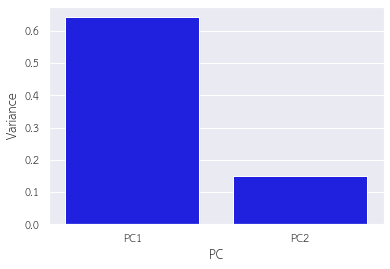

In [24]:
# Plot to see explained_variance_ratio_ using bar graph

temp_df = pd.DataFrame({'Variance':pca2.explained_variance_ratio_,
                        'PC':['PC1','PC2']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [25]:
# Transform input data of original matrix to the new space

sk_X_train_transformed  = pca2.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

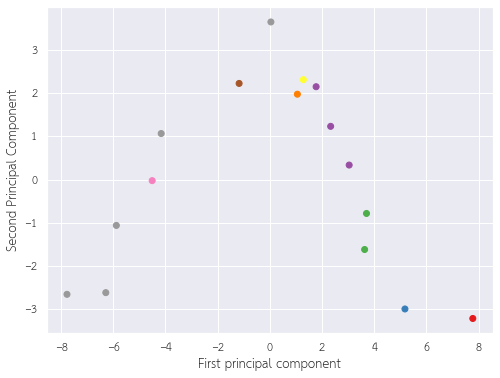

In [26]:
# Plot the new space with the transformed input data

plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [27]:
# The transformed data can also be converted back to the original data
# Since we use new space with lower dimension, 
# the derived X_train will not be the same as the original X_train

sk_derived_X_train = pca2.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[-2.58243294e-02,  2.04186594e-01,  4.03238080e-01,
        -3.30051172e-02,  3.29037518e-01,  8.07049756e-01,
         1.34943711e-01, -1.16629837e-01, -1.34156079e+00,
         5.22118096e-01,  1.99118512e-01, -7.54397509e-01,
        -1.69220698e-01,  2.41176919e-01,  6.00965220e-03,
        -2.40159500e-01,  6.59988013e-02,  1.20279807e-01,
         5.99861650e-02, -1.73418306e-02, -4.23545544e-01,
         4.88335674e-01,  5.32211812e-02, -1.23289975e-01,
         4.12021386e-02,  9.92464111e-02,  6.90979027e-02,
         1.50616909e-02, -7.94823510e-02, -1.32452871e-01],
       [ 7.62590559e-02, -8.12878678e-01, -9.27434882e-03,
         1.68598041e-01, -1.23458157e-01,  4.90699239e-01,
        -4.27826901e-01, -4.24139774e-01,  1.68485277e-01,
        -6.39860775e-01,  1.28494219e-01, -6.43195171e-01,
         7.37512196e-01, -9.47277273e-02,  3.69849569e-01,
         1.72197983e-01,  6.28647147e-02, -5.70068592e-01,
        -6.35746911e-02, -1.08454324e-02,  5.95731208e-

<AxesSubplot:>

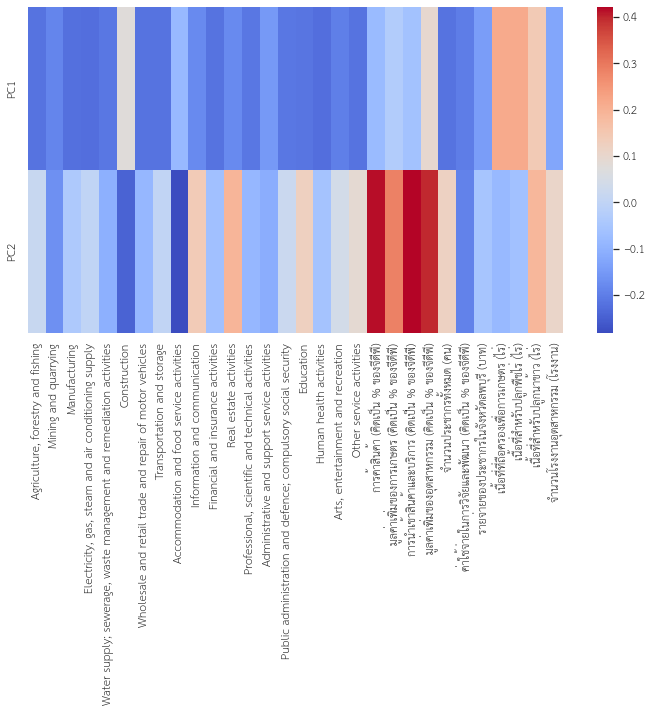

In [28]:
# Plot to see correlation between selected principal components and original variables

temp_df3 = pd.DataFrame(pca2.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

# The result shows that principal component 1 correlates with sepal length, petal width, petal length
# Principal component 2 correlates with petal width and petal length

#### components = 3

In [29]:
num_components=3
pca3 = PCA(n_components=num_components)
pca3.fit(sk_scaled_X_train)

PCA(n_components=3)

In [30]:
pca3.explained_variance_

array([20.56030885,  4.82058242,  2.06092471])

In [31]:
pca3.components_

array([[-2.16162572e-01, -1.88239599e-01, -2.21828653e-01,
        -2.25194205e-01, -2.12501028e-01,  7.82108889e-02,
        -2.18151924e-01, -2.17426037e-01, -8.35528427e-02,
        -1.80140432e-01, -2.18131387e-01, -1.79084397e-01,
        -2.13027186e-01, -1.51226956e-01, -2.12291686e-01,
        -2.14922959e-01, -2.24451361e-01, -1.97377328e-01,
        -2.17652539e-01, -7.90426104e-02, -2.97519627e-02,
        -5.98465887e-02,  9.60649858e-02, -2.17501415e-01,
        -2.00631963e-01, -1.42563450e-01,  2.14512434e-01,
         2.14023315e-01,  1.43656538e-01, -1.27248735e-01],
       [ 1.58942773e-02, -1.69081636e-01, -3.90782407e-02,
         1.33112516e-04, -1.04041952e-01, -2.43806376e-01,
        -8.80321097e-02,  3.36281964e-03, -2.81948642e-01,
         1.39286794e-01, -6.65636917e-02,  1.91696501e-01,
        -8.81261923e-02, -1.09153534e-01,  2.17094853e-02,
         1.23475640e-01, -5.67956972e-02,  3.99863798e-02,
         9.03297461e-02,  4.14084202e-01,  2.85555931e-

In [32]:
eig_pairs

[(19.275289548789683,
  array([-0.21616257+0.j, -0.1882396 +0.j, -0.22182865+0.j, -0.22519421+0.j,
         -0.21250103+0.j,  0.07821089+0.j, -0.21815192+0.j, -0.21742604+0.j,
         -0.08355284+0.j, -0.18014043+0.j, -0.21813139+0.j, -0.1790844 +0.j,
         -0.21302719+0.j, -0.15122696+0.j, -0.21229169+0.j, -0.21492296+0.j,
         -0.22445136+0.j, -0.19737733+0.j, -0.21765254+0.j, -0.07904261+0.j,
         -0.02975196+0.j, -0.05984659+0.j,  0.09606499+0.j, -0.21750142+0.j,
         -0.20063196+0.j, -0.14256345+0.j,  0.21451243+0.j,  0.21402331+0.j,
          0.14365654+0.j, -0.12724873+0.j])),
 (4.519296018798742,
  array([ 1.58942773e-02+0.j, -1.69081636e-01+0.j, -3.90782407e-02+0.j,
          1.33112516e-04+0.j, -1.04041952e-01+0.j, -2.43806376e-01+0.j,
         -8.80321097e-02+0.j,  3.36281964e-03+0.j, -2.81948642e-01+0.j,
          1.39286794e-01+0.j, -6.65636917e-02+0.j,  1.91696501e-01+0.j,
         -8.81261923e-02+0.j, -1.09153534e-01+0.j,  2.17094853e-02+0.j,
          1.

In [33]:
pca3.explained_variance_ratio_

array([0.64250965, 0.1506432 , 0.0644039 ])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

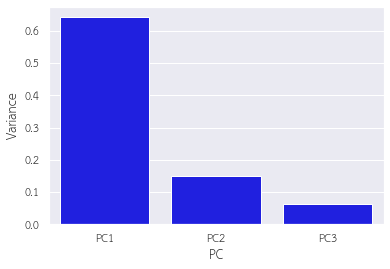

In [34]:
temp_df = pd.DataFrame({'Variance':pca3.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [35]:
sk_X_train_transformed  = pca3.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

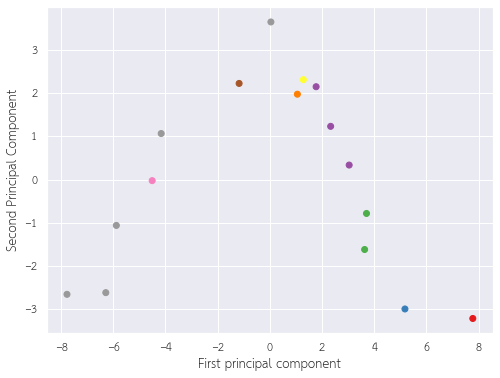

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [37]:
sk_derived_X_train = pca3.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[-1.01794635e-01,  2.71030203e-01,  3.66177858e-01,
        -5.71995175e-02,  3.05033939e-01,  5.89938935e-01,
         1.83077446e-01, -8.81181876e-02, -1.30534777e+00,
         5.15183957e-01,  1.60640216e-01, -6.56386586e-01,
        -2.21760802e-01,  3.78034426e-01, -6.20177611e-02,
        -2.65708915e-01,  4.39723260e-02,  1.44229411e-01,
         5.83088677e-02,  1.42913512e-03, -6.48175494e-01,
         4.44357060e-01,  7.05690980e-02, -1.07008947e-01,
         7.48189147e-02,  1.55000763e-01,  6.45292148e-02,
        -2.22857166e-02,  1.11793635e-01, -1.42094928e-01],
       [-1.96008241e-01, -5.73320229e-01, -1.42093170e-01,
         8.18885839e-02, -2.09483736e-01, -2.87396564e-01,
        -2.55322109e-01, -3.21957881e-01,  2.98267837e-01,
        -6.64711791e-01, -9.40678566e-03, -2.91937287e-01,
         5.49215573e-01,  3.95751059e-01,  1.26048526e-01,
         8.06323371e-02, -1.60751922e-02, -4.84236451e-01,
        -6.95858977e-02,  5.64271686e-02, -2.09312136e-

<AxesSubplot:>

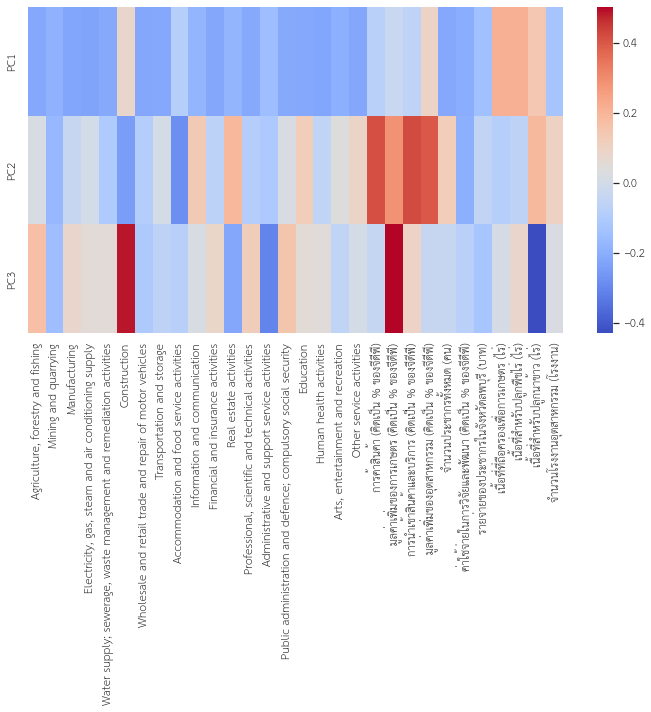

In [38]:
temp_df3 = pd.DataFrame(pca3.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

#### components = 4

In [39]:
num_components=4
pca4 = PCA(n_components=num_components)
pca4.fit(sk_scaled_X_train)

PCA(n_components=4)

In [40]:
pca4.explained_variance_

array([20.56030885,  4.82058242,  2.06092471,  1.37227778])

In [41]:
pca4.components_

array([[-2.16162572e-01, -1.88239599e-01, -2.21828653e-01,
        -2.25194205e-01, -2.12501028e-01,  7.82108889e-02,
        -2.18151924e-01, -2.17426037e-01, -8.35528427e-02,
        -1.80140432e-01, -2.18131387e-01, -1.79084397e-01,
        -2.13027186e-01, -1.51226956e-01, -2.12291686e-01,
        -2.14922959e-01, -2.24451361e-01, -1.97377328e-01,
        -2.17652539e-01, -7.90426104e-02, -2.97519627e-02,
        -5.98465887e-02,  9.60649858e-02, -2.17501415e-01,
        -2.00631963e-01, -1.42563450e-01,  2.14512434e-01,
         2.14023315e-01,  1.43656538e-01, -1.27248735e-01],
       [ 1.58942773e-02, -1.69081636e-01, -3.90782407e-02,
         1.33112516e-04, -1.04041952e-01, -2.43806376e-01,
        -8.80321097e-02,  3.36281964e-03, -2.81948642e-01,
         1.39286794e-01, -6.65636917e-02,  1.91696501e-01,
        -8.81261923e-02, -1.09153534e-01,  2.17094853e-02,
         1.23475640e-01, -5.67956972e-02,  3.99863798e-02,
         9.03297461e-02,  4.14084202e-01,  2.85555931e-

In [42]:
eig_pairs

[(19.275289548789683,
  array([-0.21616257+0.j, -0.1882396 +0.j, -0.22182865+0.j, -0.22519421+0.j,
         -0.21250103+0.j,  0.07821089+0.j, -0.21815192+0.j, -0.21742604+0.j,
         -0.08355284+0.j, -0.18014043+0.j, -0.21813139+0.j, -0.1790844 +0.j,
         -0.21302719+0.j, -0.15122696+0.j, -0.21229169+0.j, -0.21492296+0.j,
         -0.22445136+0.j, -0.19737733+0.j, -0.21765254+0.j, -0.07904261+0.j,
         -0.02975196+0.j, -0.05984659+0.j,  0.09606499+0.j, -0.21750142+0.j,
         -0.20063196+0.j, -0.14256345+0.j,  0.21451243+0.j,  0.21402331+0.j,
          0.14365654+0.j, -0.12724873+0.j])),
 (4.519296018798742,
  array([ 1.58942773e-02+0.j, -1.69081636e-01+0.j, -3.90782407e-02+0.j,
          1.33112516e-04+0.j, -1.04041952e-01+0.j, -2.43806376e-01+0.j,
         -8.80321097e-02+0.j,  3.36281964e-03+0.j, -2.81948642e-01+0.j,
          1.39286794e-01+0.j, -6.65636917e-02+0.j,  1.91696501e-01+0.j,
         -8.81261923e-02+0.j, -1.09153534e-01+0.j,  2.17094853e-02+0.j,
          1.

In [43]:
pca4.explained_variance_ratio_

array([0.64250965, 0.1506432 , 0.0644039 , 0.04288368])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

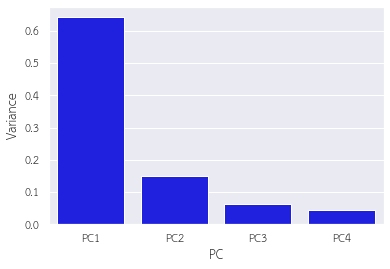

In [44]:
temp_df = pd.DataFrame({'Variance':pca4.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [45]:
sk_X_train_transformed  = pca4.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

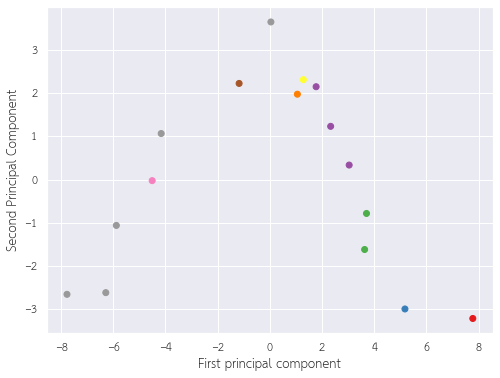

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [47]:
sk_derived_X_train = pca4.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[-1.01582772e-01,  2.74108087e-01,  3.66152479e-01,
        -5.67300113e-02,  3.05106435e-01,  5.88451201e-01,
         1.85230771e-01, -8.80963179e-02, -1.30233452e+00,
         5.22872100e-01,  1.59103073e-01, -6.52569209e-01,
        -2.25175983e-01,  3.80162804e-01, -6.10328847e-02,
        -2.66482953e-01,  4.36654029e-02,  1.48785906e-01,
         5.70940644e-02,  4.44421427e-03, -6.45653425e-01,
         4.46085207e-01,  6.83326229e-02, -1.06018255e-01,
         7.81772756e-02,  1.41851739e-01,  6.76122143e-02,
        -1.94241348e-02,  1.09416151e-01, -1.59649453e-01],
       [-1.80413327e-01, -3.46762239e-01, -1.43961274e-01,
         1.16448174e-01, -2.04147426e-01, -3.96906217e-01,
        -9.68193799e-02, -3.20348090e-01,  5.20067838e-01,
        -9.88001241e-02, -1.22553371e-01, -1.09463771e-02,
         2.97829615e-01,  5.52417477e-01,  1.98543667e-01,
         2.36566065e-02, -3.86672947e-02, -1.48840339e-01,
        -1.59005580e-01,  2.78362226e-01, -2.36666853e-

<AxesSubplot:>

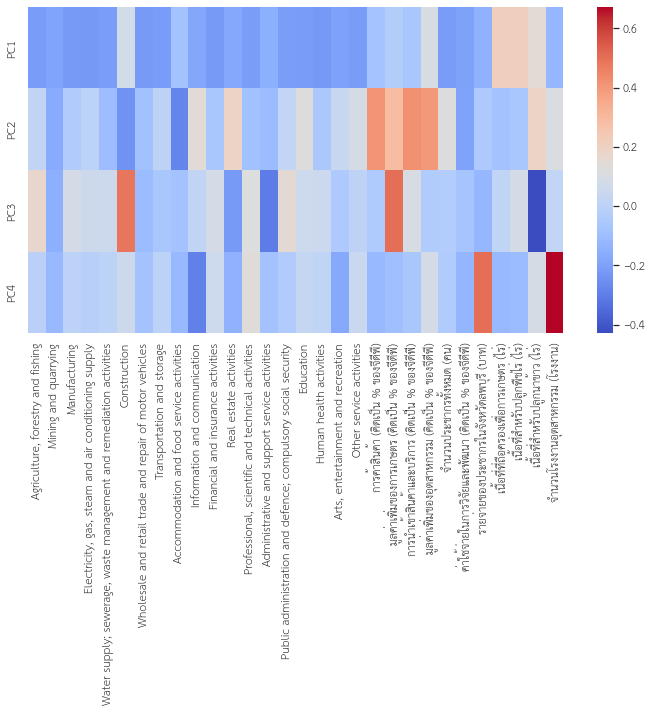

In [48]:
temp_df3 = pd.DataFrame(pca4.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3", 3:"PC4"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

#### components = 5

In [49]:
num_components=5
pca5 = PCA(n_components=num_components)
pca5.fit(sk_scaled_X_train)

PCA(n_components=5)

In [50]:
pca5.explained_variance_

array([20.56030885,  4.82058242,  2.06092471,  1.37227778,  1.00622576])

In [51]:
pca5.components_

array([[-2.16162572e-01, -1.88239599e-01, -2.21828653e-01,
        -2.25194205e-01, -2.12501028e-01,  7.82108889e-02,
        -2.18151924e-01, -2.17426037e-01, -8.35528427e-02,
        -1.80140432e-01, -2.18131387e-01, -1.79084397e-01,
        -2.13027186e-01, -1.51226956e-01, -2.12291686e-01,
        -2.14922959e-01, -2.24451361e-01, -1.97377328e-01,
        -2.17652539e-01, -7.90426104e-02, -2.97519627e-02,
        -5.98465887e-02,  9.60649858e-02, -2.17501415e-01,
        -2.00631963e-01, -1.42563450e-01,  2.14512434e-01,
         2.14023315e-01,  1.43656538e-01, -1.27248735e-01],
       [ 1.58942773e-02, -1.69081636e-01, -3.90782407e-02,
         1.33112516e-04, -1.04041952e-01, -2.43806376e-01,
        -8.80321097e-02,  3.36281964e-03, -2.81948642e-01,
         1.39286794e-01, -6.65636917e-02,  1.91696501e-01,
        -8.81261923e-02, -1.09153534e-01,  2.17094853e-02,
         1.23475640e-01, -5.67956972e-02,  3.99863798e-02,
         9.03297461e-02,  4.14084202e-01,  2.85555931e-

In [52]:
eig_pairs

[(19.275289548789683,
  array([-0.21616257+0.j, -0.1882396 +0.j, -0.22182865+0.j, -0.22519421+0.j,
         -0.21250103+0.j,  0.07821089+0.j, -0.21815192+0.j, -0.21742604+0.j,
         -0.08355284+0.j, -0.18014043+0.j, -0.21813139+0.j, -0.1790844 +0.j,
         -0.21302719+0.j, -0.15122696+0.j, -0.21229169+0.j, -0.21492296+0.j,
         -0.22445136+0.j, -0.19737733+0.j, -0.21765254+0.j, -0.07904261+0.j,
         -0.02975196+0.j, -0.05984659+0.j,  0.09606499+0.j, -0.21750142+0.j,
         -0.20063196+0.j, -0.14256345+0.j,  0.21451243+0.j,  0.21402331+0.j,
          0.14365654+0.j, -0.12724873+0.j])),
 (4.519296018798742,
  array([ 1.58942773e-02+0.j, -1.69081636e-01+0.j, -3.90782407e-02+0.j,
          1.33112516e-04+0.j, -1.04041952e-01+0.j, -2.43806376e-01+0.j,
         -8.80321097e-02+0.j,  3.36281964e-03+0.j, -2.81948642e-01+0.j,
          1.39286794e-01+0.j, -6.65636917e-02+0.j,  1.91696501e-01+0.j,
         -8.81261923e-02+0.j, -1.09153534e-01+0.j,  2.17094853e-02+0.j,
          1.

In [53]:
pca5.explained_variance_ratio_

array([0.64250965, 0.1506432 , 0.0644039 , 0.04288368, 0.03144455])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

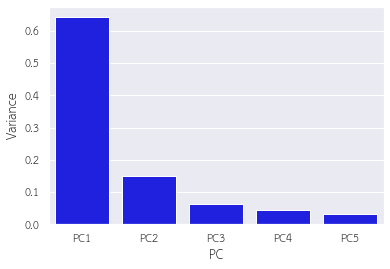

In [54]:
temp_df = pd.DataFrame({'Variance':pca5.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3','PC4','PC5']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [55]:
sk_X_train_transformed  = pca5.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

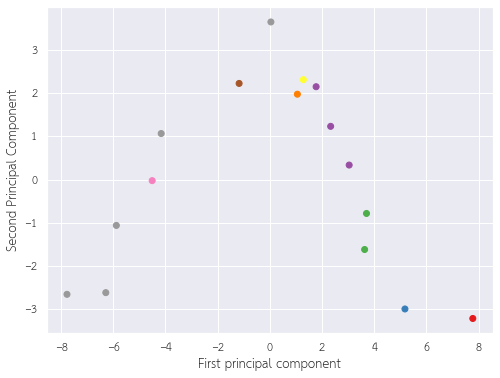

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [57]:
sk_derived_X_train = pca5.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[-7.73379647e-02, -1.15718926e-01,  2.00372081e-01,
        -9.31692180e-03,  3.16965161e-01,  3.00619904e-01,
         5.57624656e-02, -3.02905915e-01, -4.73777068e-01,
         5.79470977e-01, -3.40512126e-02, -5.52124801e-01,
        -5.39012624e-02,  7.40821110e-01,  7.80787267e-02,
        -2.82744559e-01, -1.71190078e-05, -1.42007201e-01,
        -9.02813676e-02,  2.63755742e-01, -4.07158986e-01,
         4.97311628e-01, -1.81550156e-01, -2.58671342e-02,
        -5.85717504e-02,  1.43667882e-01,  6.51766796e-02,
         1.20897735e-01, -6.49888307e-02,  8.10222951e-02],
       [-2.02108693e-01,  2.07286437e-03,  4.38663569e-03,
         7.40207651e-02, -2.14759158e-01, -1.39341561e-01,
         1.90348022e-02, -1.28126603e-01, -2.21363405e-01,
        -1.49447397e-01,  5.02899502e-02, -1.00828643e-01,
         1.44565133e-01,  2.29683871e-01,  7.40602123e-02,
         3.82082373e-02,  4.21831009e-04,  1.11374681e-01,
        -2.71272790e-02,  4.63183684e-02, -2.37082456e-

<AxesSubplot:>

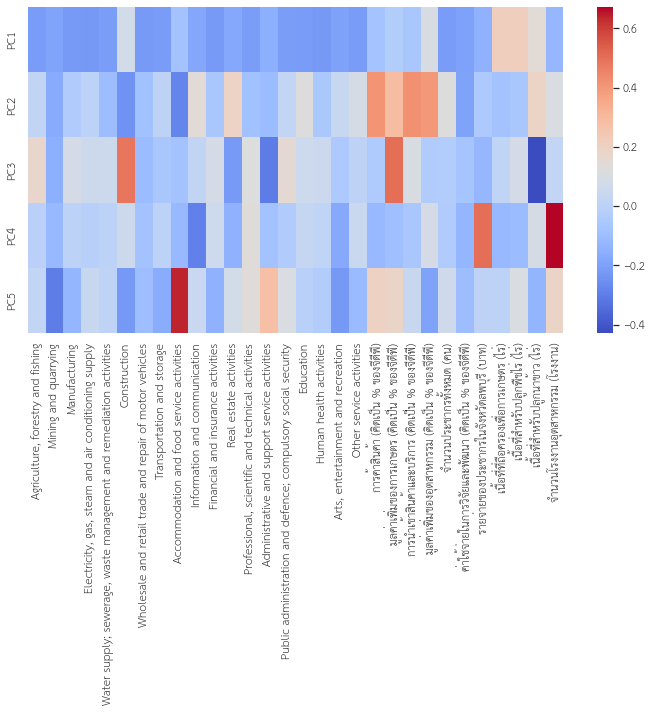

In [58]:
temp_df3 = pd.DataFrame(pca5.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3", 3:"PC4", 4:"PC5"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')